In [1]:
import pandas as pd
import numpy as np
import ffn
import pickle
import statsmodels.api as sm
import pandas_datareader.data as web
from pandas.tseries.offsets import Day,BDay
from PerformanceStats import summarystats
import scipy
import matplotlib.pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
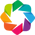

In [2]:
import matplotlib.pyplot as plt

import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

In [3]:
%matplotlib inline

In [4]:
path=r'F:\WQU_capstone'
region='EUR'

In [5]:
vix_idxs_pickle= open(path+'\\VIX_indexes.pkl',"rb")
alldata_pickle=open(path+'\\alldata_dict.pkl',"rb")
rollcosts_pickle= open(path+'\\rollcosts.pkl',"rb")
vstoxx_pickle= open(path+'\\VSTOXX_indexes.pkl',"rb")
all_idxs=pickle.load(vix_idxs_pickle)
dfdict= pickle.load(alldata_pickle)
rollcosts= pickle.load(rollcosts_pickle)
vstoxx= pickle.load(vstoxx_pickle)

In [6]:
start_dt=pd.to_datetime('1990-01-01')

if (region=='US'):
    vixidxs= all_idxs.copy()
    AGG = web.DataReader('AGG', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'AGG'})
    GLD = web.DataReader('GLD', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'GLD'})
    idxs= all_idxs.join(AGG,how='left').join(GLD,how='left').fillna(method='ffill')

else:
    ## SYBA.DE: SPDR Bloomberg Barclays Euro Aggregate Bond UCITS ETF --  listed on XETRA exchange
    ## 4GLD.DE: XETRA Gold ETF
    vixidxs= vstoxx[['STOXX','VSTOXX','VST1ME','VMT5ME']].copy()
    EAGG = web.DataReader('SYBA.DE', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'EAGG'})
    EGLD=web.DataReader('4GLD.DE', 'yahoo',start=start_dt).drop(columns=['High','Low', 'Open','Close','Volume']).rename(columns={'Adj Close':'EGLD'})
    idxs= vstoxx[['STOXX','VSTOXX','VST1ME','VMT5ME']].join(EAGG,how='left').join(EGLD,how='left').fillna(method='ffill')
    idxs.rename_axis(index='date',inplace=True)

In [7]:
def rollstats(all_idxs, bmk):
    mnth_end_rets= all_idxs.asfreq('M',method='ffill').pct_change()[1:]
    window=36
    slopedict={}
    correldict={}

    for j in bmk:
        slope= pd.DataFrame()
        correl=pd.DataFrame()
        for i in range(window,len(mnth_end_rets)+1):
            snap=mnth_end_rets.iloc[i-window:i,:]
            X= snap.loc[:,j]
            idx=snap.index[-1]
            for l in snap.columns[~snap.columns.str.contains(j)]:
                Y= snap.loc[:,l]
                X1= sm.add_constant(X, prepend=False)
                reg= sm.OLS(Y,X1).fit()
                slope.loc[idx,l]= reg.params[0]
                correl.loc[idx,l]= Y.corr(X)
        slopedict[j]= slope
        correldict[j]=correl
    return slopedict, correldict

In [8]:
def rollingreturns(all_idxs,windows=[36,60]):
    mnth_end_rets= all_idxs.asfreq('M',method='ffill').pct_change()[1:]
    df= pd.DataFrame(columns=all_idxs.columns)
    rolling=  {}
    for window in windows:
        rolling[window]={}
        for k in ['Returns','Risk','Returns/Risk']:
            rolling[window][k]= pd.DataFrame(columns=all_idxs.columns)
    
        for i in range(window,len(mnth_end_rets)+1):
            idx= mnth_end_rets.index[i-1]
            rolling[window]['Returns'].loc[idx,:]=scipy.stats.gmean(1+mnth_end_rets.iloc[i-window:i,:])**12-1
            rolling[window]['Risk'].loc[idx,:]= mnth_end_rets.iloc[i-window:i,:].std()*np.sqrt(12)
            rolling[window]['Returns/Risk'].loc[idx,:]= rolling[window]['Returns'].loc[idx,:]/rolling[window]['Risk'].loc[idx,:]

            
        for k in ['Returns','Risk','Returns/Risk']:
            df.loc['Average '+str(window)+ 'months rolling returns',:]= np.round(100*rolling[window]['Returns'].mean(),2)
            df.loc['Average '+str(window)+ 'months rolling risk',:]= np.round(rolling[window]['Risk'].mean()*100,2)
            df.loc['Average '+str(window)+ 'months rolling return/risk',:]= np.round(rolling[window]['Returns/Risk'].mean().astype(float),2)
        
    return df,rolling

In [9]:
def monthly_rebalancer(wtdict,idxs):
    recon_idxs=idxs[list(wtdict.keys())]
    dts= pd.DataFrame(data=recon_idxs.index)

    dts['month']= pd.DatetimeIndex(dts.date).month
    dts['year']= pd.DatetimeIndex(dts.date).year
    alldts=dts.groupby(['year','month'])['date'].min().reset_index()
    alldts.drop(columns=['month','year'],inplace=True)
    for keys,values in wtdict.items():
        alldts[keys+'_wt']= values

    alldts.drop(index=0,inplace=True)

    idxtemp=pd.merge(recon_idxs,alldts.set_index('date'),left_index=True,right_index=True,how='left')

    for keys,values in wtdict.items():
        idxtemp[keys+'_open']= idxtemp[keys].shift(1)
        idxtemp[keys+'_shares']= idxtemp[keys+'_wt']/idxtemp[keys+'_open']

    idxtemp.loc[:,idxtemp.columns.str.contains('shares')]=idxtemp.loc[:,idxtemp.columns.str.contains('shares')].fillna(method='ffill')
    idxtemp.dropna(subset=[keys+'_shares' for keys in wtdict.keys()],inplace=True)

    for keys,values in wtdict.items():
        idxtemp[keys+'_cumretfactor']= idxtemp[keys+'_shares']*idxtemp[keys]
        idxtemp[keys+'_lagcumretfactor']=idxtemp[keys+'_shares']*idxtemp[keys+'_open']


    idxtemp['1Dret']= idxtemp.loc[:,idxtemp.columns.str.contains('_cumretfactor')].sum(axis=1)/(idxtemp.loc[:,idxtemp.columns.str.contains('_lagcumretfactor')].sum(axis=1))-1
    
    portpx= pd.DataFrame()
    portpx['idxlevel']= (1+idxtemp['1Dret']).cumprod()
    portpx.loc[idxtemp.index[0]- BDay(),'idxlevel']=1
    portpx.sort_index(inplace=True)
    portpx= portpx.astype(float)
    
    return portpx['idxlevel']

In [10]:
slopedict= {}
correldict={}
if(region=='US'):
    bmk= ['SPY','VIX']
else:
    bmk= ['STOXX','VSTOXX']
slopedict, correldict =rollstats(vixidxs,bmk)

In [11]:
slopedict[bmk[1]].hvplot.line(title='36 mnth rolling Beta with spot {}'.format(bmk[1]),width=1000, height=500)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
correldict[bmk[1]].hvplot.line(title='36 mnth rolling correlation with spot {}'.format(bmk[1]),width=1000, height=500)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [13]:
ffn.core.to_drawdown_series(idxs).hvplot.line(y=list(idxs.columns),title='Max Drawdown',width=1000, height=500)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [14]:
if(region=='US'):
    wtdict={'SPY 60%/AGG 40%':{'SPY':0.6,'AGG':0.4},'SPY 60%/AGG 30%/GLD 10%':{'SPY':0.6,'AGG':0.3,'GLD':0.1},'SPY 60%/AGG 35%/GLD 5%':{'SPY':0.6,'AGG':0.35,'GLD':0.05},'SPY 60%/AGG 30%/VIX-ST 10%':{'SPY':0.6,'AGG':0.3,'1M_ER':0.1},\
        'SPY 60%/AGG 30%/VIX-MT 10%':{'SPY':0.6,'AGG':0.3,'4M_MediumTermER':0.1}}
else:
    wtdict={'STOXX 50 60%/EUR AGG 40%':{'STOXX':0.6,'EAGG':0.4},'STOXX 50 60%/EUR AGG 30%/XETRA GOLD ETF 10%':{'STOXX':0.6,'EAGG':0.3,'EGLD':0.1},'STOXX 50 60%/ EUR AGG 35%/XETRA GOLD ETF 5%':{'STOXX':0.6,'EAGG':0.35,'EGLD':0.05},'STOXX 60%/EUR AGG 30%/VSTOXX-ST 10%':{'STOXX':0.6,'EAGG':0.3,'VST1ME':0.1},\
        'STOXX 60%/EUR AGG 30%/VSTOXX-MT 10%':{'STOXX':0.6,'EAGG':0.3,'VMT5ME':0.1}}
    
portdict={}
        
for port in wtdict.keys():
        portdict[port]=pd.Series(monthly_rebalancer(wtdict[port],idxs),name=port)

portpx=pd.concat([portdict[i] for i in portdict.keys()],axis=1)
portstats=ffn.core.GroupStats(portpx).stats

In [16]:
a=summarystats(region,datapath=path,outputpath=path+'//results//')
a.PerformanceSummaryWrapper(idxs[bmk[0]].to_frame().join(portpx,how='inner'))

STOXX STOXX 50 60%/EUR AGG 40%  \
start                                2017-06-30               2017-06-30   
end                                  2020-10-09               2020-10-09   
Annualized Compunded Return/CAGR(%)       -1.52                     0.59   
Annualized Arthimetic mean(%)              -0.1                     1.13   
Risk (%)                                  16.65                    10.56   
Downside Risk (%)                            13                      8.4   
Return/Risk                               -0.09                     0.06   
Sharpe-Ratio                              -0.12                     0.02   
Sortino-Ratio                             -0.12                     0.07   
Maximum Drawdown (%)                     -38.27                   -26.66   
Average Drawdown(%)                       -4.27                    -2.12   
Calmar Ratio                              -0.04                     0.02   
Return/Max Drawdown                       -0.04                     0.02   

                                    STOXX 50 60%/EUR AGG 30%/XETRA GOLD ETF 10%  \
start                                                                2017-06-30   
end                                                                  2020-10-09   
Annualized Compunded Return/CAGR(%)                                        1.55   
Annualized Arthimetic mean(%)                                              2.05   
Risk (%)                                                                  10.38   
Downside Risk (%)                                                          8.17   
Return/Risk                                                                0.15   
Sharpe-Ratio                                                               0.11   
Sortino-Ratio                                                              0.19   
Maximum Drawdown (%)                                                     -26.67   
Average Drawdown(%)                                                       -2.03   
Calmar Ratio                                                               0.06   
Return/Max Drawdown                                                        0.06   

                                    STOXX 50 60%/ EUR AGG 35%/XETRA GOLD ETF 5%  \
start                                                                2017-06-30   
end                                                                  2020-10-09   
Annualized Compunded Return/CAGR(%)                                        1.07   
Annualized Arthimetic mean(%)                                              1.59   
Risk (%)                                                                  10.46   
Downside Risk (%)                                                          8.28   
Return/Risk                                                                 0.1   
Sharpe-Ratio                                                               0.06   
Sortino-Ratio                                                              0.13   
Maximum Drawdown (%)                                                     -26.67   
Average Drawdown(%)                                                       -2.05   
Calmar Ratio                                                               0.04   
Return/Max Drawdown                                                        0.04   

                                    STOXX 60%/EUR AGG 30%/VSTOXX-ST 10%  \
start                                                        2017-06-30   
end                                                          2020-10-09   
Annualized Compunded Return/CAGR(%)                                0.82   
Annualized Arthimetic mean(%)                                      0.96   
Risk (%)                                                           5.55   
Downside Risk (%)                                                  3.57   
Return/Risk                                                        0.15   
Sharpe-Ratio                                       

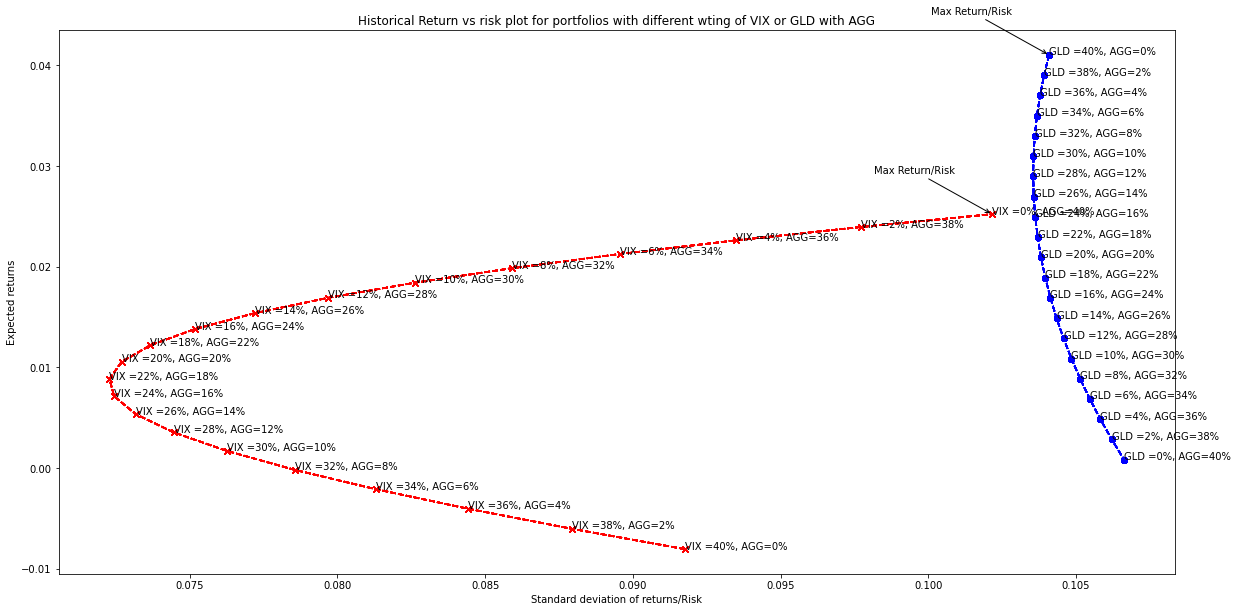

In [25]:
allocstats={}

if (region=='US'):
    bmk2= ['SPY','AGG','GLD','1M_ER','4M_MediumTermER']
else:
    bmk2= ['STOXX','EAGG','EGLD','VST1ME','VMT5ME']
    
for k in [bmk2[4],bmk2[2]]:
    allocstats[k]=pd.DataFrame()
    allocstats[k][bmk2[1]]= np.arange(0,0.41,0.02)
    allocstats[k][bmk2[0]]=0.6
    allocstats[k][k]= 1-allocstats[k][bmk2[0]]-allocstats[k][bmk2[1]]
    for idx in allocstats[k].index:    
        strategyreturns=pd.Series(monthly_rebalancer(allocstats[k].loc[idx,allocstats[k].columns[~allocstats[k].columns.str.contains('Return|Risk')]].to_dict(),idxs))
        allocstats[k].loc[idx,'Return(%)']=(scipy.stats.gmean(1+ffn.core.to_monthly(strategyreturns).to_returns()[1:])**12-1)
        allocstats[k].loc[idx,'Risk(%)']= (ffn.core.to_monthly(strategyreturns).to_returns()[1:]).std()*np.sqrt(12)

    snap=allocstats[k][allocstats[k]['Return(%)']/allocstats[k]['Risk(%)']==np.max(allocstats[k]['Return(%)']/allocstats[k]['Risk(%)'])]

    for i in allocstats[k].index:
        
        if (k==bmk2[4]):
            plt.annotate("VIX ={:.0%}, AGG={:.0%}".format(allocstats[k].loc[i,k],allocstats[k].loc[i,bmk2[1]]),xy=(allocstats[k].loc[i,'Risk(%)'],allocstats[k].loc[i,'Return(%)']))
            plt.plot(allocstats[k]['Risk(%)'],allocstats[k]['Return(%)'] ,color='red', marker='x', linestyle='dashed')
        
        if(k==bmk2[2]):
            plt.annotate("GLD ={:.0%}, AGG={:.0%}".format(allocstats[k].loc[i,k],allocstats[k].loc[i,bmk2[1]]),xy=(allocstats[k].loc[i,'Risk(%)'],allocstats[k].loc[i,'Return(%)']))
            plt.plot(allocstats[k]['Risk(%)'],allocstats[k]['Return(%)'] ,color='blue', marker='o', linestyle='dashed')

    plt.annotate('Max Return/Risk', xy=(snap['Risk(%)'],snap['Return(%)']),xytext=(snap['Risk(%)']-0.004,snap['Return(%)']+.004), arrowprops=dict(arrowstyle='->'))

plt.rcParams['figure.figsize']=[20,10]
plt.xlabel('Standard deviation of returns/Risk')
plt.ylabel('Expected returns')
plt.title('Historical Return vs risk plot for portfolios with different wting of VIX or GLD with AGG')
plt.show()

In [ ]:
dfroll,b=rollingreturns(idxs)

In [ ]:
b[36]['Returns-Risk'].hvplot.hist(y='1M_ER')* hv.VLine(b[36]['Returns-Risk']['1M_ER'].mean()).opts(color='black',alpha= 0.3)